## 高中以下學校數量是否與房屋成交或房價有關係

## import packages

In [78]:
import pandas as pd
import numpy as np

## load Data

In [87]:
tw_house = pd.read_csv("tw_house.csv")
school = pd.read_csv("school.csv")

## Processing

In [88]:
tw_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
鄉鎮市區           640 non-null object
土地移轉總面積平方公尺    640 non-null float64
建物移轉總面積平方公尺    640 non-null float64
單價每平方公尺        640 non-null int64
建物現況格局-房       640 non-null int64
建物現況格局-廳       640 non-null int64
建物現況格局-衛       640 non-null int64
車位移轉總面積平方公尺    640 non-null float64
車位總價元          640 non-null int64
屋齡             640 non-null int64
建築完成年          640 non-null int64
交易年            640 non-null int64
總價元            640 non-null float64
中山區            640 non-null int64
中正區            640 non-null int64
信義區            640 non-null int64
內湖區            640 non-null int64
北投區            640 non-null int64
南港區            640 non-null int64
士林區            640 non-null int64
大同區            640 non-null int64
大安區            640 non-null int64
文山區            640 non-null int64
松山區            640 non-null int64
萬華區            640 non-null int64
dtypes: float64(4), int64(20), objec

In [89]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 8 columns):
代碼      281 non-null object
學校名稱    281 non-null object
公私立別    281 non-null object
縣市名稱    281 non-null object
地址      281 non-null object
電話      281 non-null object
網址      281 non-null object
備註      0 non-null float64
dtypes: float64(1), object(7)
memory usage: 17.6+ KB


In [90]:
tw_house = tw_house.ix[:,0:13]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [91]:
school = school[['學校名稱','地址']]
school.head()

,學校名稱,地址
0,私立育達家商,[105]臺北市松山區美仁里寧安街12號
1,市立西松高中,[105]臺北市松山區鵬程里健康路325巷7號
2,市立中崙高中,[105]臺北市松山區八德路四段101號
3,臺北市私立協和祐德高級中學,[110]臺北市信義區忠孝東路5段790巷27號
4,市立松山高中,[110]臺北市信義區基隆路一段156號


In [92]:
school['地址'] = school['地址'].astype(str)
school.head()

,學校名稱,地址
0,私立育達家商,[105]臺北市松山區美仁里寧安街12號
1,市立西松高中,[105]臺北市松山區鵬程里健康路325巷7號
2,市立中崙高中,[105]臺北市松山區八德路四段101號
3,臺北市私立協和祐德高級中學,[110]臺北市信義區忠孝東路5段790巷27號
4,市立松山高中,[110]臺北市信義區基隆路一段156號


In [93]:
school['鄉鎮市區'] = school['地址'].str.slice(8,11)
school.head()

,學校名稱,地址,鄉鎮市區
0,私立育達家商,[105]臺北市松山區美仁里寧安街12號,松山區
1,市立西松高中,[105]臺北市松山區鵬程里健康路325巷7號,松山區
2,市立中崙高中,[105]臺北市松山區八德路四段101號,松山區
3,臺北市私立協和祐德高級中學,[110]臺北市信義區忠孝東路5段790巷27號,信義區
4,市立松山高中,[110]臺北市信義區基隆路一段156號,信義區


In [99]:
school_count = school.groupby('鄉鎮市區').count()
school_count = school_count.drop('地址',axis=1)
school_count = school_count.rename(columns={'學校名稱':'學校數量'})
school_count.head()

,學校數量
鄉鎮市區,
中山區,22
中正區,19
信義區,18
內湖區,26
北投區,28


## 合併

In [100]:
tw_house = pd.merge(tw_house,school_count, on = '鄉鎮市區')
tw_house = tw_house[['鄉鎮市區','總價元','學校數量']]
tw_house.head()

,鄉鎮市區,總價元,學校數量
0,大同區,1290.0,19
1,大同區,980.0,19
2,大同區,1000.0,19
3,大同區,2050.0,19
4,大同區,400.0,19


In [102]:
price = tw_house.groupby('鄉鎮市區').mean()
price

,總價元,學校數量
鄉鎮市區,,
中山區,2047.156811,22
中正區,2407.794918,19
信義區,2545.463951,18
內湖區,2473.346847,26
北投區,1960.550000,28
南港區,2990.178571,12
士林區,3244.573075,33
大同區,1690.912222,19
大安區,3413.413889,32


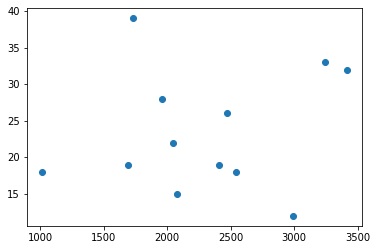

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(price['總價元'],price['學校數量'])